<a href="https://colab.research.google.com/github/BaruBangun/My_Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd

df = pd.read_csv('car_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [69]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [70]:
df = df.drop(['User ID'], axis=1)

In [71]:
df.head(len(df))

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


In [72]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
CF = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(CF.fit_transform(X))

In [95]:
print(X)

[[0.0 1.0 35 20000]
 [0.0 1.0 40 43500]
 [0.0 1.0 49 74000]
 ...
 [1.0 0.0 28 138500]
 [1.0 0.0 48 134000]
 [1.0 0.0 44 73500]]


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [75]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)

In [76]:
print(X_train)

[[-1.01765584  1.01765584 -1.99868007 -0.09261347]
 [ 0.98265048 -0.98265048  1.20222065  0.87440623]
 [-1.01765584  1.01765584 -0.11579729 -0.36281015]
 ...
 [-1.01765584  1.01765584 -0.39822971 -0.53346069]
 [ 0.98265048 -0.98265048 -0.02165315  0.09225795]
 [ 0.98265048 -0.98265048 -0.11579729  1.17304467]]


In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [78]:
X_test = SC.transform(X_test)

In [79]:
y_pred = model.predict(X_test)

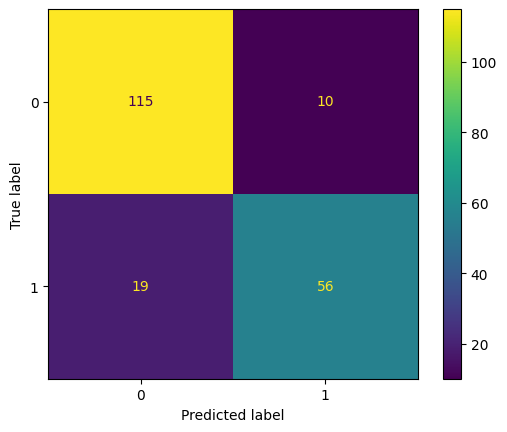

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
CM = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(CM).plot()

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       125
           1       0.85      0.75      0.79        75

    accuracy                           0.85       200
   macro avg       0.85      0.83      0.84       200
weighted avg       0.85      0.85      0.85       200



In [99]:
new_data = [['Male', 40, 100000]]

In [100]:
new_data = np.array(CF.transform(new_data))

In [101]:
print(new_data)

[[0.0 1.0 40 100000]]


In [102]:
new_data = SC.transform(new_data)
print(new_data)

[[-1.01765584  1.01765584 -0.02165315  0.76063921]]


In [103]:
model.predict(new_data)

array([1])